In [4]:
import numpy as np # linear algebra
import tensorflow as tf
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [5]:
import glob
gen = [glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]
                 
forg = [glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [6]:
import glob
import keras
import cv2

# gen = glob.glob("../input/handwritten-signatures/sample_Signature/sample_Signature/genuine/*.*")
# forg = glob.glob("../input/handwritten-signatures/sample_Signature/sample_Signature/forged/*.*")
# ../input/handwritten-signatures/sample_Signature/sample_Signature/forged/NFI-00101014.png

train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0
        
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [7]:
train_data.shape

(540, 224, 224, 3)

In [8]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Lambda, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, Conv2D, BatchNormalization
# from keras.layers.normalization import Normalization
from keras.regularizers import l2
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import RMSprop, Adam

# network = Sequential()

# network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
# network.add(MaxPooling2D(3,3))
# network.add(Conv2D(32,(3,3),activation='relu'))
# network.add(MaxPooling2D(2,2))
# network.add(Flatten())
# network.add(Dense(128,activation = 'relu'))
# network.add(Dropout(rate=0.3))
# network.add(Dense(1, activation = 'softmax'))

# network = Sequential()
# network.add(Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)))
# network.add(Conv2D(32, (3,3), activation='relu'))
# network.add(Conv2D(16, (3,3), activation='relu'))

# network.add(Flatten())

# network.add(Dense(128, activation='relu'))
# network.add(Dense(1, activation='sigmoid'))

In [10]:
# network = Sequential()
# # network.add(Convolution2D(96, 11, 11, activation='relu', name='conv1_1', subsample=(3, 3), input_shape= (224, 224, 3), 
# #                     init='glorot_uniform', dim_ordering='tf'))

# network.add(Conv2D(96, (11,11), (3,3), input_shape = (224, 244, 3), activation="relu", kernel_initializer="glorot_uniform"), )
# network.add(BatchNormalization(epsilon=1e-06, momentum=0.9))
# network.add(MaxPooling2D((3,3), strides=(2, 2)))    
# network.add(ZeroPadding2D((2, 2)))

# # network.add(Convolution2D(256, 5, 5, activation='relu', name='conv2_1', subsample=(1, 1), init='glorot_uniform',  dim_ordering='tf'))
# network.add(Conv2D(256, (5,5), (1,1), activation="relu", kernel_initializer="glorot_uniform"), )
# network.add(BatchNormalization(epsilon=1e-06, momentum=0.9))
# network.add(MaxPooling2D((3,3), strides=(2, 2)))
# network.add(Dropout(0.3))# added extra
# network.add(ZeroPadding2D((1, 1)))

# # network.add(Convolution2D(384, 3, 3, activation='relu', name='conv3_1', subsample=(1, 1), init='glorot_uniform',  dim_ordering='tf'))
# network.add(Conv2D(384, (3,3), (1,1), activation="relu", kernel_initializer="glorot_uniform"))
# network.add(ZeroPadding2D((1, 1)))

# # network.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2', subsample=(1, 1), init='glorot_uniform', dim_ordering='tf'))    
# network.add(Conv2D(256, (3,3), (1,1), activation="relu", kernel_initializer="glorot_uniform"))
# network.add(MaxPooling2D((3,3), strides=(2, 2)))
# network.add(Dropout(0.3))# added extra
# #    model.add(SpatialPyramidPooling([1, 2, 4]))
# network.add(Flatten(name='flatten'))
# network.add(Dense(1024, activation='relu', bias_regularizer=l2(0.005), kernel_initializer='glorot_uniform'))
# network.add(Dropout(0.5))

# network.add(Dense(128, activation='relu', bias_regularizer=l2(0.005), kernel_initializer='glorot_uniform')) # softmax changed to relu

# network.compile(optimizer=RMSprop(learning_rate=1e-4, rho=0.9, epsilon=1e-08),loss="binary_crossentropy",metrics=["accuracy"])
# network.summary()

In [11]:
# model1 = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [12]:


# Create the base model from the pre-trained model MobileNet V2
# base_model = tf.keras.applications.MobileNetV3Large(input_shape=(224, 224, 3),
#                                                include_top=False,
#                                                weights='imagenet'
#                                                )
# base_model.trainable = False
                                               
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# prediction_layer = keras.layers.Dense(1)

# network = tf.keras.Sequential([
#   base_model,
#   global_average_layer,
#   prediction_layer
# ])

# base_learning_rate = 0.001
# network.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

network.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [14]:
from keras.applications import MobileNetV2, MobileNetV3Small, Xception
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard

EPOCHS = 20
BATCH_SIZE = 1

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1)

base_model1 = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
model1 = Sequential([base_model1, global_average_layer, prediction_layer])
model1.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])
progress1 = model1.fit(train_data,train_labels, batch_size=BATCH_SIZE,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

base_model2 = MobileNetV3Small(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
model2 = Sequential([base_model2, global_average_layer, prediction_layer])
model2.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])
progress2 = model2.fit(train_data,train_labels, batch_size=BATCH_SIZE,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

base_model3 = Xception(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
model3 = Sequential([base_model3, global_average_layer, prediction_layer])
model3.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])
progess3 = model3.fit(train_data,train_labels, batch_size=BATCH_SIZE,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/5
 46/513 [=>............................] - ETA: 2:06 - loss: 6.6327 - accuracy: 0.5652

KeyboardInterrupt: 

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 40
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

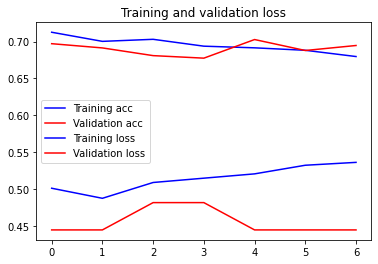

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [ ]:
# pred = network.predict(test_data)

# pred

# from sklearn.metrics import accuracy_score

# accuracy_score(pred.argmax(axis=1), test_labels)

test_loss, test_acc = network.evaluate(test_data, test_labels, verbose=1) 
print("Test Accuracy:", test_acc)

6/6 [==============================] - 9s 1s/step - loss: 0.6508 - accuracy: 0.6389
Test Accuracy: 0.6388888955116272


In [ ]:
network.save("ver2_testmodel1.h5")  #saving the model